In [583]:
import pygame

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec  # Une grille pour placer les sous-plans dans une figure.
import plotly.express as px             # px crée des figures complete d'un seul coup
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [584]:
df= pd.read_csv("Stores.csv", sep=",")
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [585]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [586]:
df.columns = df.columns.str.replace(' ','_')
df

,Store_ID_,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [587]:
top_10_sales = df.sort_values('Store_Sales', ascending=False).head(10) # Meilleurs 10 articles, de toutes les boutiques, tri descendant
top_10_sales

,Store_ID_,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,650,1989,2414,860,116320
868,869,1775,2104,980,105150
432,433,1365,1638,680,102920
408,409,1303,1587,1310,102310
758,759,1486,1758,820,101820
557,558,1137,1374,700,101780
866,867,1565,1854,900,100900
166,167,1465,1763,680,99570
692,693,1548,1858,480,99480
871,872,1800,2158,1100,98260


In [588]:
labels = top_10_sales["Store_ID_"]
labels

649    650
868    869
432    433
408    409
758    759
557    558
866    867
166    167
692    693
871    872
Name: Store_ID_, dtype: int64

In [590]:
Store_Sales = top_10_sales["Store_Sales"]
Store_Sales

649    116320
868    105150
432    102920
408    102310
758    101820
557    101780
866    100900
166     99570
692     99480
871     98260
Name: Store_Sales, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

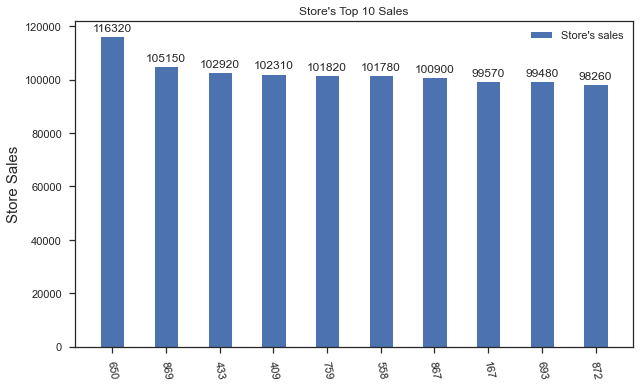

In [591]:
x= np.arange(len(labels))

width= 0.45
axs = plt.subplot()
rects1= axs.bar(x, Store_Sales, width, label="Store's sales")

axs.set_ylabel("Store Sales", fontsize= 15)
axs.set_xticks(x, labels)
axs.set_title("Store's Top 10 Sales")

axs.legend()
axs.bar_label(rects1, padding=3)
plt.rcParams['figure.figsize'] = (10,6)
plt.xticks(rotation = -80)

plt.show

In [512]:
axe_y= Store_Sales
axe_y

649    116320
868    105150
432    102920
408    102310
758    101820
557    101780
866    100900
166     99570
692     99480
871     98260
Name: Store_Sales, dtype: int64

In [513]:
axe_x= top_10_sales["Daily_Customer_Count"]
axe_x

649     860
868     980
432     680
408    1310
758     820
557     700
866     900
166     680
692     480
871    1100
Name: Daily_Customer_Count, dtype: int64

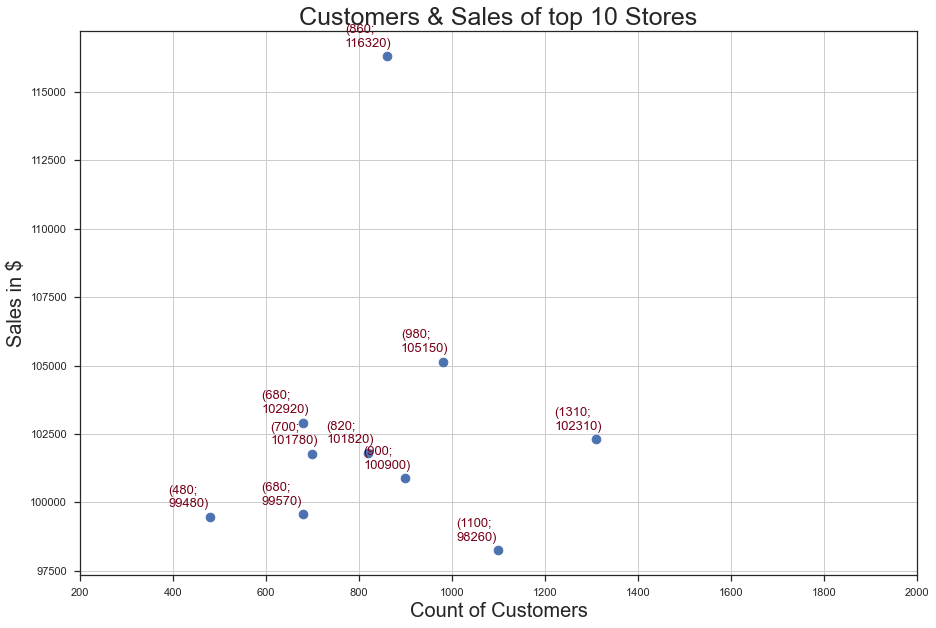

In [514]:
plt.figure(figsize=(15,10))
plt.scatter(axe_x, axe_y, s=15*5)
plt.xlabel('Count of Customers', fontsize=20)
plt.ylabel('Sales in $', fontsize=20)
plt.title('Customers & Sales of top 10 Stores', fontsize=25)
plt.xlim(200,2000)
plt.annotate
for xItem, yItem in zip(axe_x, axe_y):
    plt.text(float(xItem)-90.0,
             float(yItem)+450.0,
             "({};\n{})\n".format((xItem),(yItem)),
             fontsize=13,
             c="#750017", 
             verticalalignment= 'center',
             horizontalalignment= 'left')
plt.grid(True)

In [515]:
axe_y=df["Store_Sales"]
axe_y

0      66490
1      39820
2      54010
3      53730
4      46620
       ...  
891    66390
892    82080
893    76440
894    96610
895    54340
Name: Store_Sales, Length: 896, dtype: int64

In [516]:
axe_x= df["Daily_Customer_Count"]
axe_x

0       530
1       210
2       720
3       620
4       450
       ... 
891    1080
892     850
893    1060
894     770
895    1110
Name: Daily_Customer_Count, Length: 896, dtype: int64

C:\Users\aboud\AppData\Local\Temp\ipykernel_7364\2759487458.py:7: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale("Linear")


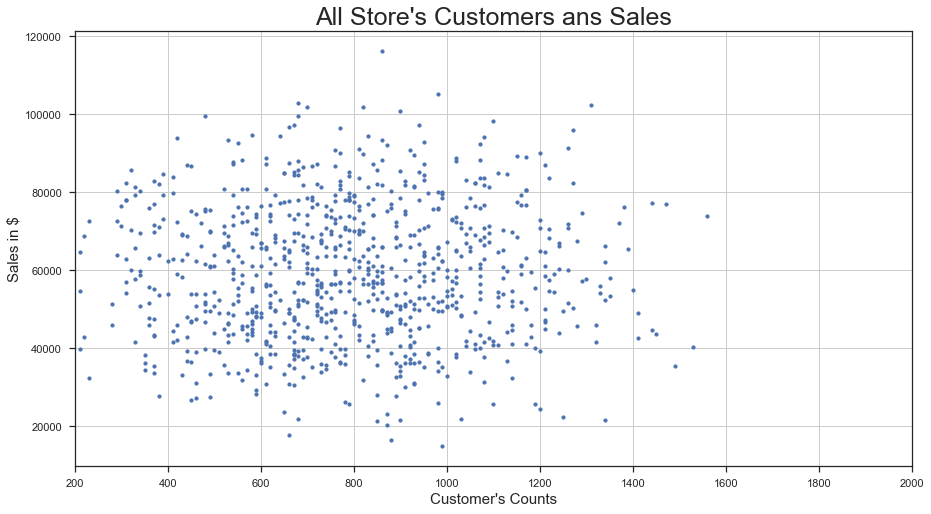

In [517]:
plt.figure(figsize=(15,8))
plt.scatter(axe_x, axe_y, s=10)
plt.xlabel("Customer's Counts", fontsize=15)
plt.ylabel("Sales in $", fontsize=15)
plt.title("All Store's Customers ans Sales", fontsize=25)
plt.xlim(200,2000)
plt.yscale("Linear")
plt.grid(True)

# Disponibilité d'articles

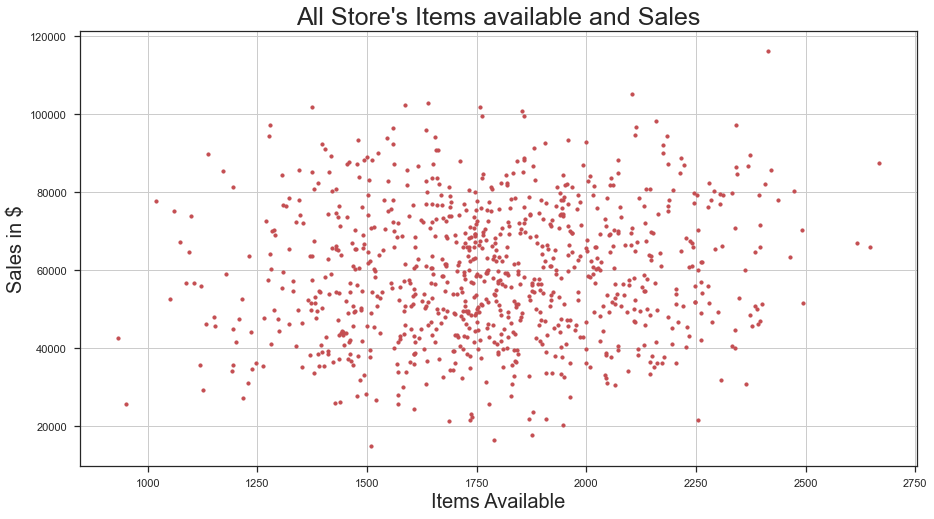

In [518]:
axe_y= df["Store_Sales"]
axe_x=df["Items_Available"]

plt.figure(figsize=(15,8))
plt.scatter(axe_x, axe_y, s=10,c="r")
plt.xlabel("Items Available", fontsize=20)
plt.ylabel("Sales in $", fontsize=20)
plt.title("All Store's Items available and Sales", fontsize=25)
plt.grid(True)

# Store sales vs Store area

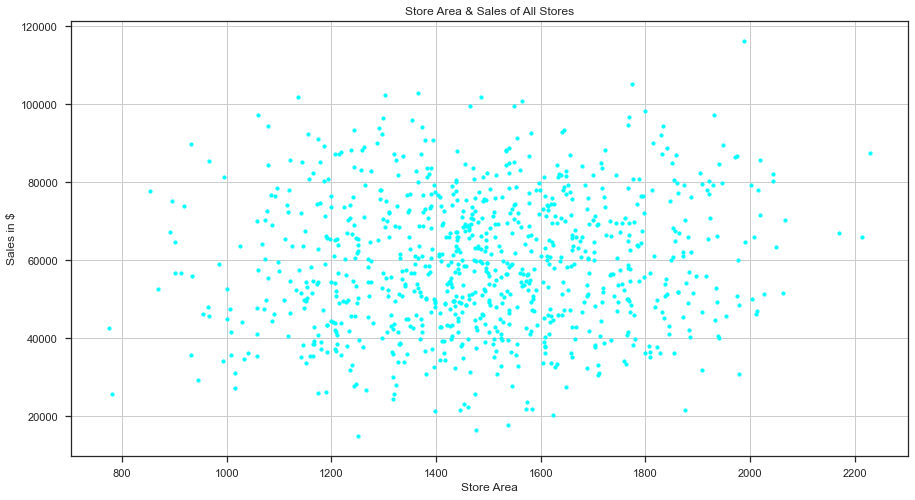

In [519]:
axe_y= df["Store_Sales"]
axe_x= df["Store_Area"]

plt.figure(figsize=(15,8))
plt.scatter(axe_x,axe_y,s=10,c="#00ffff")
plt.xlabel('Store Area')
plt.ylabel('Sales in $')
plt.title('Store Area & Sales of All Stores')
plt.grid(True)

In [520]:
df["spend_per_customer"]=df["Store_Sales"]/df["Daily_Customer_Count"]
df

,Store_ID_,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,spend_per_customer
0,1,1659,1961,530,66490,125.452830
1,2,1461,1752,210,39820,189.619048
2,3,1340,1609,720,54010,75.013889
3,4,1451,1748,620,53730,86.661290
4,5,1770,2111,450,46620,103.600000
...,...,...,...,...,...,...
891,892,1582,1910,1080,66390,61.472222
892,893,1387,1663,850,82080,96.564706
893,894,1200,1436,1060,76440,72.113208
894,895,1299,1560,770,96610,125.467532


In [521]:
df_2 = df.sort_values("spend_per_customer", ascending=False).head(10)
df_2

,Store_ID_,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,spend_per_customer
39,40,1270,1516,10,45480,4548.000000
151,152,1662,1986,70,63730,910.428571
876,877,1259,1493,100,88270,882.700000
887,888,1156,1398,140,92370,659.785714
230,231,1347,1628,120,72350,602.916667
146,147,1442,1750,130,58920,453.230769
687,688,1475,1775,230,72740,316.260870
300,301,1578,1885,220,68850,312.954545
538,539,1622,1968,210,64780,308.476190
710,711,1502,1815,190,55980,294.631579


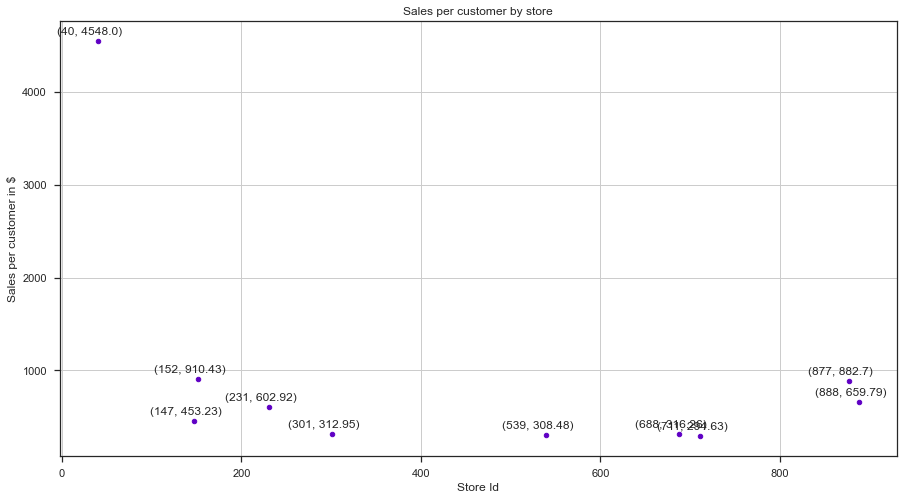

In [522]:
axe_y = df_2["spend_per_customer"]
axe_x= df_2["Store_ID_"]

plt.figure(figsize=(15,8))
plt.scatter(axe_x, axe_y, s=20, c="#5f00c4")
plt.xlabel("Store Id")
plt.ylabel("Sales per customer in $")
plt.title("Sales per customer by store")
for xItem, yItem in zip(axe_x,axe_y):
    plt.text(float(xItem)-9.0,
             float(yItem)+100.0,
             '({}, {})'.format((xItem), round(yItem,2)),
             fontsize=12,
             verticalalignment='center',
             horizontalalignment= 'center')
plt.grid(True)

In [523]:
df_2["Total_Monthly_Custumers_Count"]=df["Daily_Customer_Count"]*30
df_2

,Store_ID_,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,spend_per_customer,Total_Monthly_Custumers_Count
39,40,1270,1516,10,45480,4548.000000,300
151,152,1662,1986,70,63730,910.428571,2100
876,877,1259,1493,100,88270,882.700000,3000
887,888,1156,1398,140,92370,659.785714,4200
230,231,1347,1628,120,72350,602.916667,3600
146,147,1442,1750,130,58920,453.230769,3900
687,688,1475,1775,230,72740,316.260870,6900
300,301,1578,1885,220,68850,312.954545,6600
538,539,1622,1968,210,64780,308.476190,6300
710,711,1502,1815,190,55980,294.631579,5700


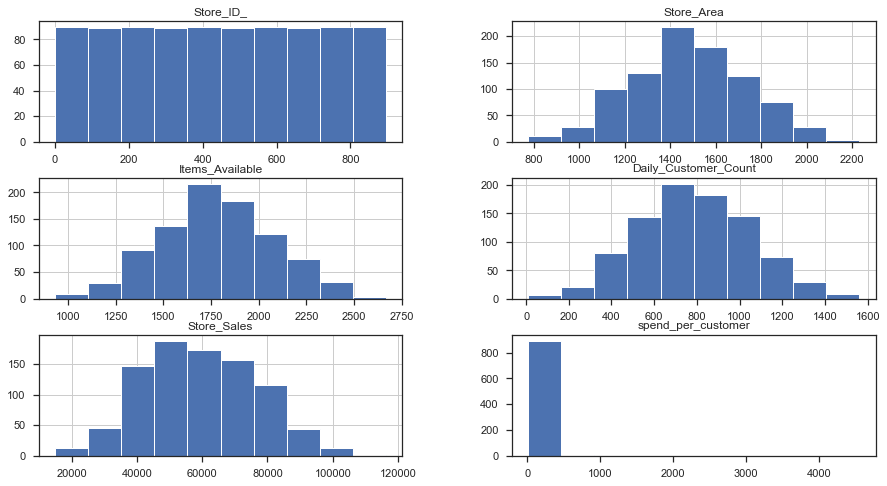

In [524]:
df.hist(figsize=(15,8))
plt.grid(False)

In [525]:
correlation = df.corr()
print(correlation['Store_Sales'].sort_values(ascending = False))

Store_Sales             1.000000
spend_per_customer      0.139546
Items_Available         0.098849
Store_Area              0.097474
Store_ID_               0.071486
Daily_Customer_Count    0.008629
Name: Store_Sales, dtype: float64


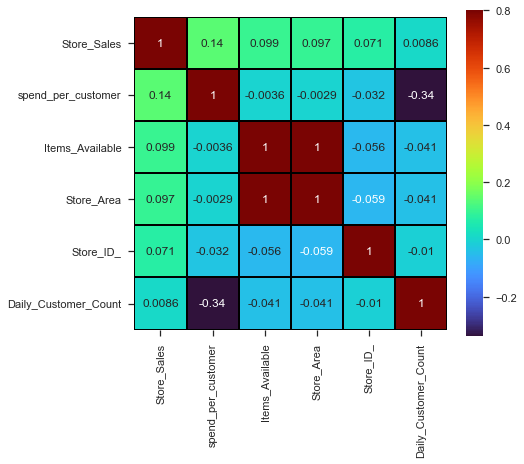

In [526]:
k= 10
cols = correlation.nlargest(k,"Store_Sales")["Store_Sales"].index
cm = np.corrcoef(df[cols].values.T)
f, ax= plt.subplots(figsize = (7,6))
sns.heatmap(cm,
            vmax=.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap="turbo",
            linecolor="black",
            xticklabels = cols.values,
            annot_kws = {"size":12},
            yticklabels = cols.values)
plt.show()

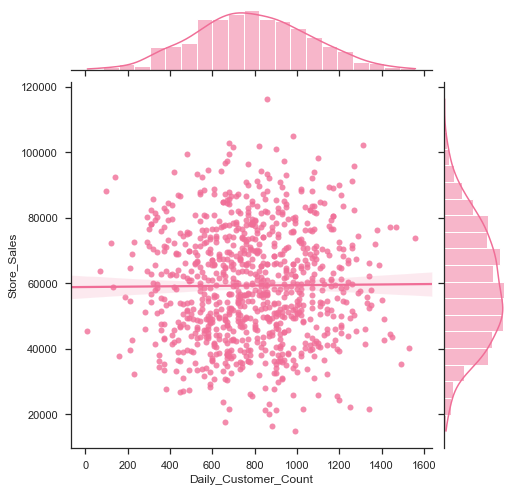

In [527]:
sns.jointplot(x="Daily_Customer_Count",
              y="Store_Sales",
              data=df, kind="reg",
              truncate=False,
              color="#f06e97",
              height=7)

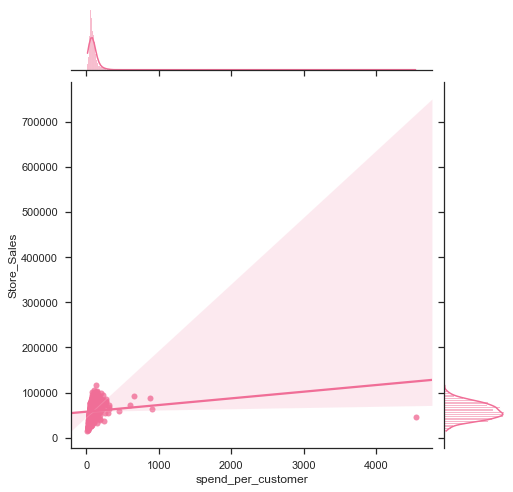

In [528]:
sns.jointplot(x="spend_per_customer",
              y="Store_Sales",
              data=df, kind="reg",
              truncate=False,
              color="#f06e97",
              height=7)

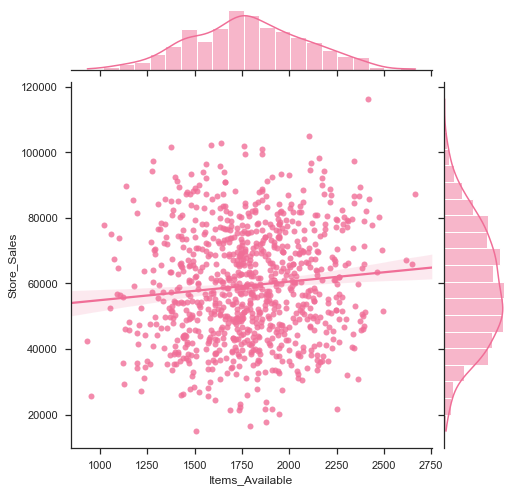

In [529]:
sns.jointplot(x="Items_Available",
              y="Store_Sales",
              data=df,
              kind="reg",
              truncate=False,
              color="#f06e97",
              height=7)

<h1 align="center">Observation</h1> 
Il semble que le nombre quotidien des clients n'influe pas les ventes des boutiques. Par contre les achats par clients augmentent a petits pas. cela dit, les articles dispo ont un grand impact sur les ventes des boutiques.

C'est ce qu'on observe aussi grace a la heatmap: plus on a de liens entre les "criteres", plus l'intersection des "crietres" se rapproche de 1 ou -1 ( -1=inversement proportionnel)

In [530]:
df

,Store_ID_,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,spend_per_customer
0,1,1659,1961,530,66490,125.452830
1,2,1461,1752,210,39820,189.619048
2,3,1340,1609,720,54010,75.013889
3,4,1451,1748,620,53730,86.661290
4,5,1770,2111,450,46620,103.600000
...,...,...,...,...,...,...
891,892,1582,1910,1080,66390,61.472222
892,893,1387,1663,850,82080,96.564706
893,894,1200,1436,1060,76440,72.113208
894,895,1299,1560,770,96610,125.467532


In [531]:
Stores_Ids=df["Store_ID_"]
Stores_Ids

0        1
1        2
2        3
3        4
4        5
      ... 
891    892
892    893
893    894
894    895
895    896
Name: Store_ID_, Length: 896, dtype: int64

In [532]:
df.drop("Store_ID_", axis=1, inplace=True)
df.head(5)

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,spend_per_customer
0,1659,1961,530,66490,125.452830
1,1461,1752,210,39820,189.619048
2,1340,1609,720,54010,75.013889
3,1451,1748,620,53730,86.661290
4,1770,2111,450,46620,103.600000


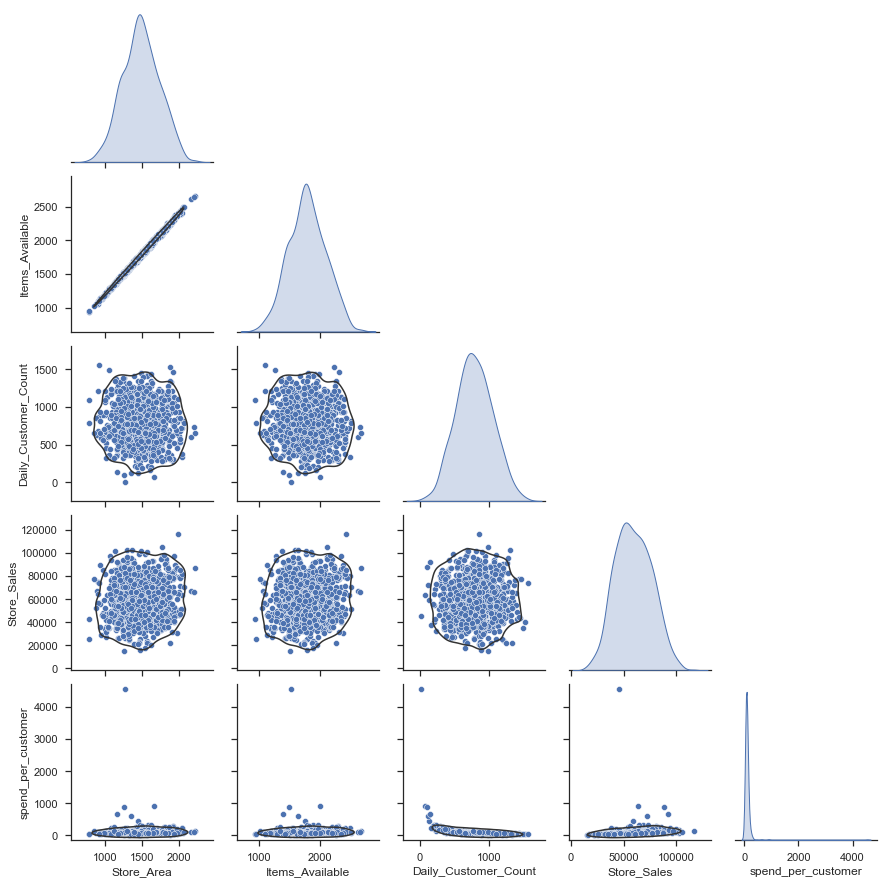

In [533]:
sns.set_theme(style="ticks")
g=sns.pairplot(df, diag_kind="kde", corner=True)
g.map_lower(sns.kdeplot, levels=2, color=".2")
plt.show()

In [534]:
df.drop("spend_per_customer", axis=1, inplace=True)
df.head(5)

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


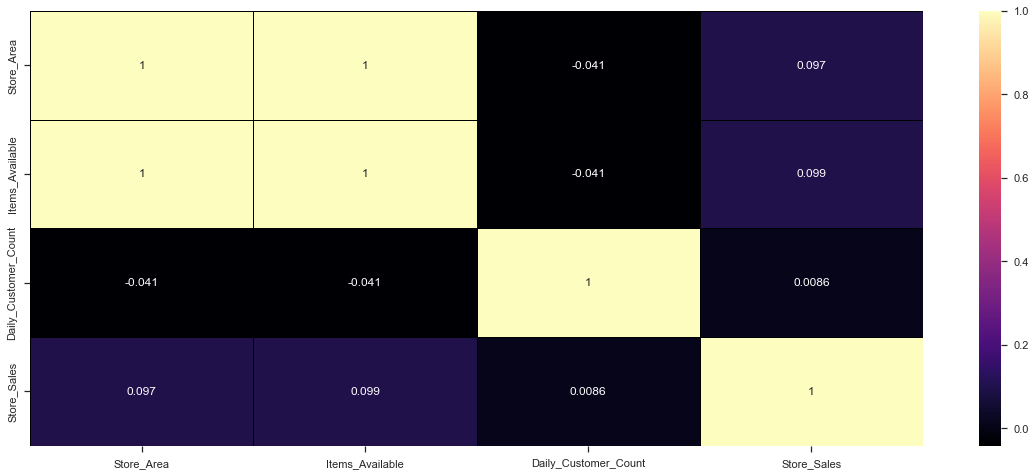

In [535]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            linecolor="black",
            cmap="magma")
plt.show()

In [536]:
model=AgglomerativeClustering(n_clusters=5,
                              affinity="euclidean",
                              linkage="complete")
clust_labels=model.fit_predict(df)

In [537]:
agglomerative= pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,3
2,1
3,1
4,1
...,...
891,0
892,0
893,0
894,2


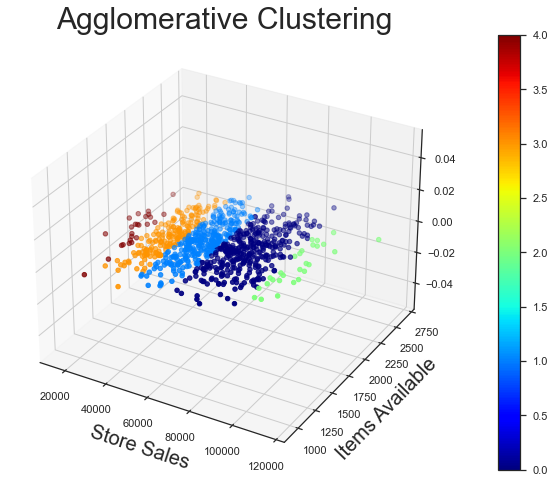

In [593]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111, projection="3d")
scatter= ax.scatter(df["Store_Sales"],
                    df["Items_Available"],
                    c=agglomerative[0],
                    s=20,
                    cmap="jet")
ax.set_title("Agglomerative Clustering",
             fontsize=30)
ax.set_xlabel("\nStore Sales",
              fontsize=20)
ax.set_ylabel("\nItems Available",
              fontsize=20)
plt.colorbar(scatter)

<h6 align="center">Par contre j'arrive pas a interpreter la plupart des graphes meme si je peux les creer... :(</h6>

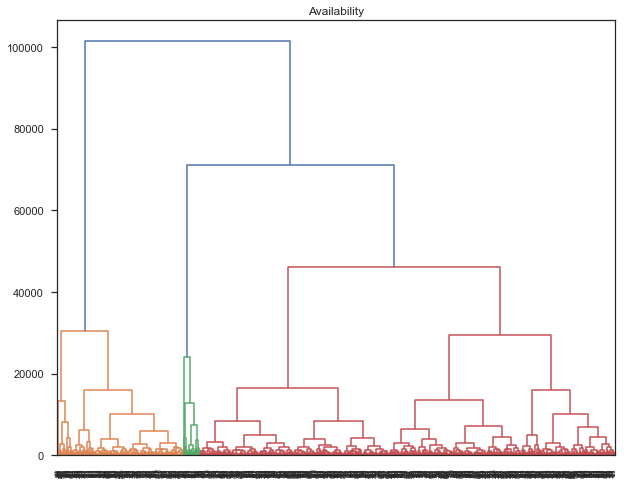

In [539]:
plt.figure(figsize=(10,8))
plt.title("Availability")
dend=shc.dendrogram(shc.linkage(df, method="complete"))

In [544]:
kmeans=KMeans(n_clusters=5, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=0)

In [545]:
labels= pd.DataFrame(kmeans.labels_)
labels

,0
0,4
1,2
2,1
3,1
4,1
...,...
891,4
892,0
893,3
894,0


In [546]:
df["Labels"]=labels
df

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Labels
0,1659,1961,530,66490,4
1,1461,1752,210,39820,2
2,1340,1609,720,54010,1
3,1451,1748,620,53730,1
4,1770,2111,450,46620,1
...,...,...,...,...,...
891,1582,1910,1080,66390,4
892,1387,1663,850,82080,0
893,1200,1436,1060,76440,3
894,1299,1560,770,96610,0


In [547]:
kmeans.predict(df)
print(kmeans.cluster_centers_)

[[1.50673196e+03 1.80741237e+03 8.02680412e+02 8.90229897e+04
  2.00000000e+00]
 [1.47478151e+03 1.76951261e+03 7.83571429e+02 4.89580672e+04
  2.73949580e+00]
 [1.44352941e+03 1.73077778e+03 7.85098039e+02 3.49223529e+04
  1.00000000e+00]
 [1.50664921e+03 1.80824607e+03 7.69214660e+02 7.42954974e+04
  8.06282723e-01]
 [1.49836866e+03 1.79749770e+03 7.98064516e+02 6.15574194e+04
  1.00921659e+00]]


In [548]:
list(df)

['Store_Area',
 'Items_Available',
 'Daily_Customer_Count',
 'Store_Sales',
 'Labels']

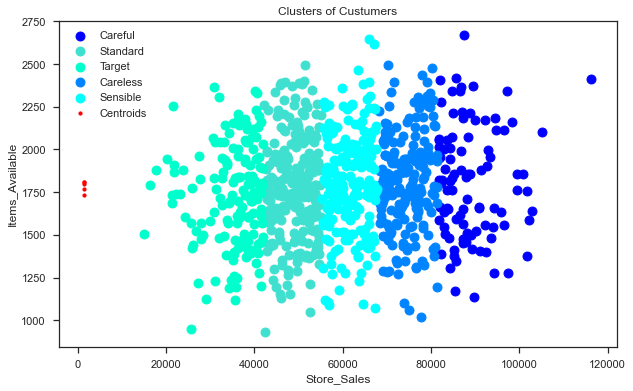

In [549]:
plt.scatter(df["Store_Sales"][df.Labels==0], df["Items_Available"][df.Labels==0], s=80, c="blue", label="Careful")
plt.scatter(df["Store_Sales"][df.Labels==1], df["Items_Available"][df.Labels==1], s=80, c="turquoise", label="Standard")
plt.scatter(df["Store_Sales"][df.Labels==2], df["Items_Available"][df.Labels==2], s=80, c="#00ffcc", label="Target")
plt.scatter(df["Store_Sales"][df.Labels==3], df["Items_Available"][df.Labels==3], s=80, c="#0084ff", label="Careless")
plt.scatter(df["Store_Sales"][df.Labels==4], df["Items_Available"][df.Labels==4], s=80, c="cyan", label="Sensible")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=10, c="red", label="Centroids")
plt.title("Clusters of Custumers")
plt.xlabel("Store_Sales")
plt.ylabel("Items_Available")
plt.legend()
plt.show()

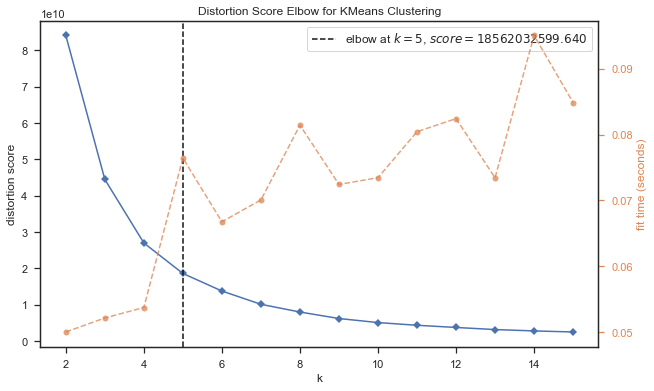

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [550]:
elbow_m= KElbowVisualizer(KMeans(random_state=1), k=15)
elbow_m.fit(df)
elbow_m.show()

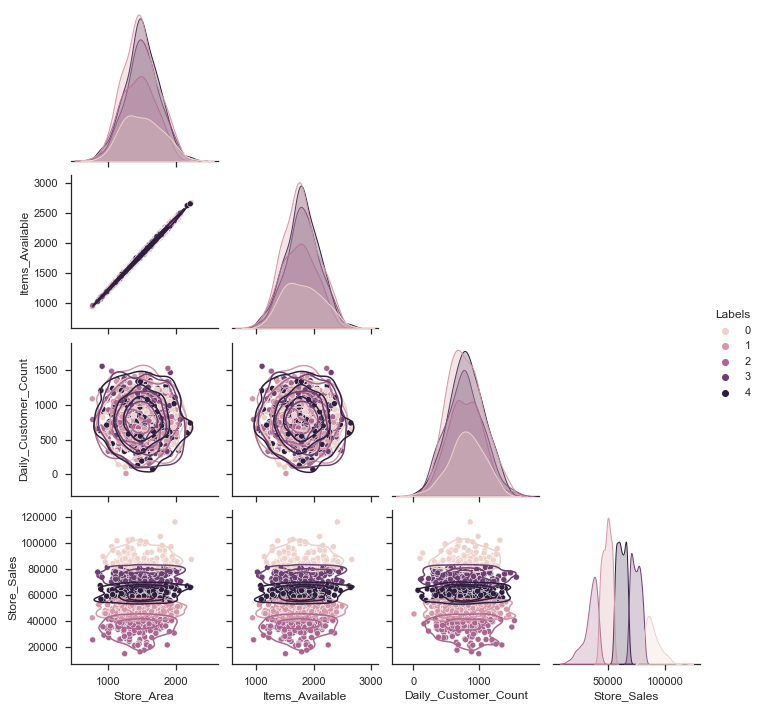

In [551]:
sns.set_theme(style="ticks")
g = sns.pairplot(df, hue="Labels",diag_kind="kde", corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

<h3 align="center"> Je comprends comment je crée les graphes, mais j'arrive pas a les interpreter ... </h3>

# Predict without cluster

In [552]:
df.drop(["Labels"], axis=1, inplace=True)
df

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620
...,...,...,...,...
891,1582,1910,1080,66390
892,1387,1663,850,82080
893,1200,1436,1060,76440
894,1299,1560,770,96610


In [571]:
x=df
y=df["Store_Sales"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state=20)

Treee = DecisionTreeClassifier()
Treee= Treee.fit(x_train, y_train)
y_pred = Treee.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.044444444444444446


In [558]:
x

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620
...,...,...,...,...
891,1582,1910,1080,66390
892,1387,1663,850,82080
893,1200,1436,1060,76440
894,1299,1560,770,96610


#### La precision est tres faible

# Boxplot

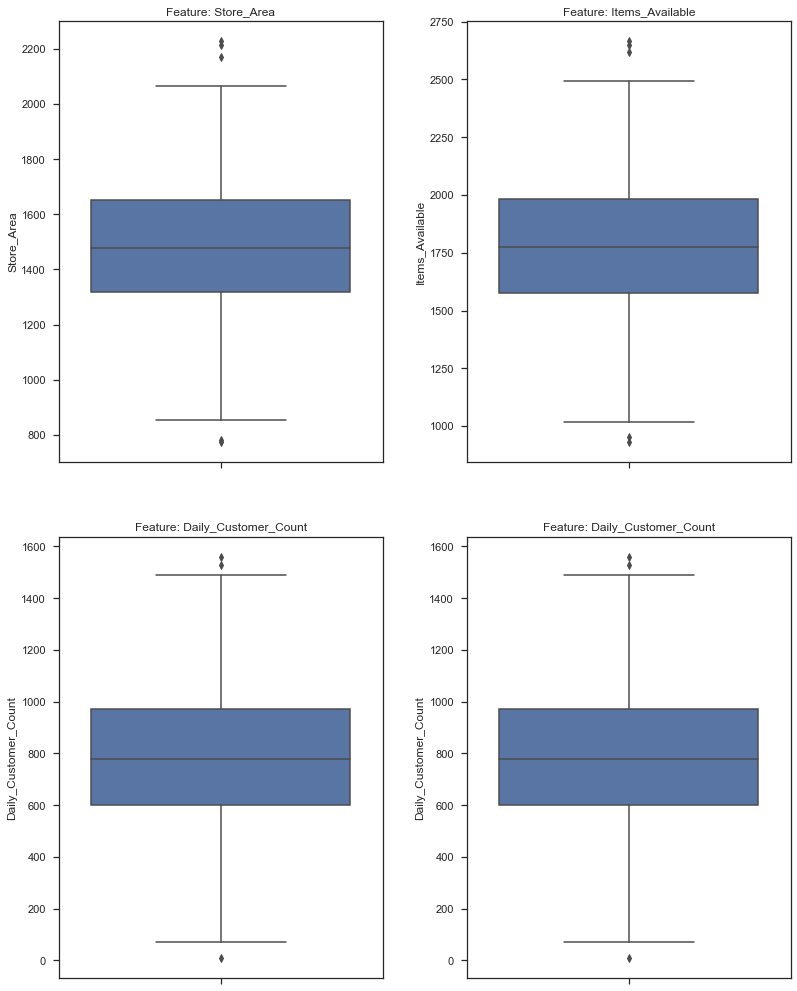

In [579]:
features = ["Store_Area", "Items_Available", "Daily_Customer_Count", "Daily_Customer_Count"]
fig, axs = plt.subplots(2, 2, figsize=(12,15))
fig.tight_layout(pad=4.0)
for f,ax in zip(features,axs.ravel()):
    ax=sns.boxplot(ax=ax,
                   data=df,
                   y=df[f])
    ax.set_title("Feature: "+ f)